# Which product lines have the highest and lowest sales? Create a chart that is representable.

Highest Sales Product Line: Classic Cars - $2,968,546.40
Lowest Sales Product Line: Trains - $203,804.26


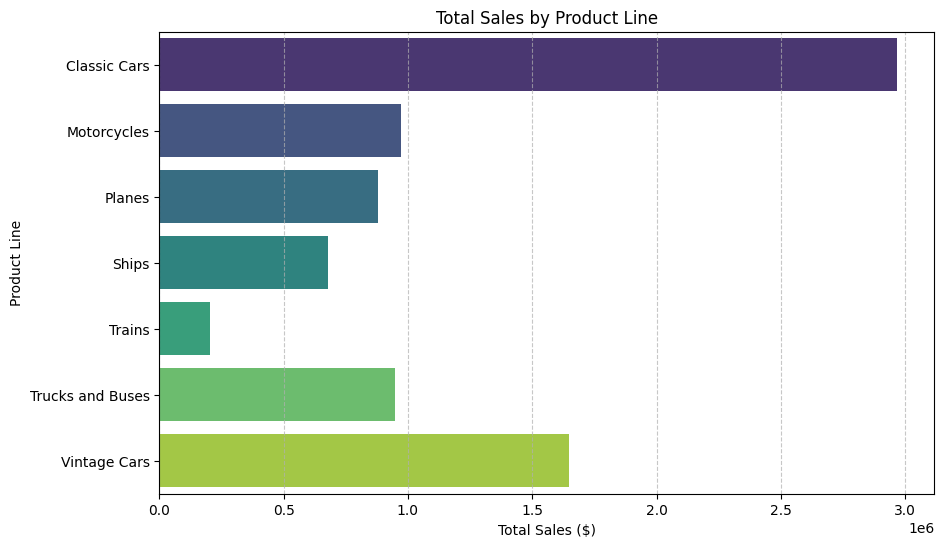

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "SalesData.xlsx"
df = pd.read_excel(file_path)

# Calculate total sales for each order
df["TOTALSALES"] = df["QUANTITYORDERED"] * df["PRICEEACH"]

# Group by product line and sum the sales
sales_by_product_line = df.groupby("PRODUCTLINE")["TOTALSALES"].sum().reset_index()

# Identify highest and lowest sales product lines
highest_sales = sales_by_product_line.loc[sales_by_product_line["TOTALSALES"].idxmax()]
lowest_sales = sales_by_product_line.loc[sales_by_product_line["TOTALSALES"].idxmin()]

print(f"Highest Sales Product Line: {highest_sales['PRODUCTLINE']} - ${highest_sales['TOTALSALES']:,.2f}")
print(f"Lowest Sales Product Line: {lowest_sales['PRODUCTLINE']} - ${lowest_sales['TOTALSALES']:,.2f}")

# Plot sales per product line
plt.figure(figsize=(10, 6))
sns.barplot(x="TOTALSALES", y="PRODUCTLINE", hue="PRODUCTLINE", data=sales_by_product_line, palette="viridis")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Line")
plt.title("Total Sales by Product Line")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


# Show sales performance over time, is there any pattern?


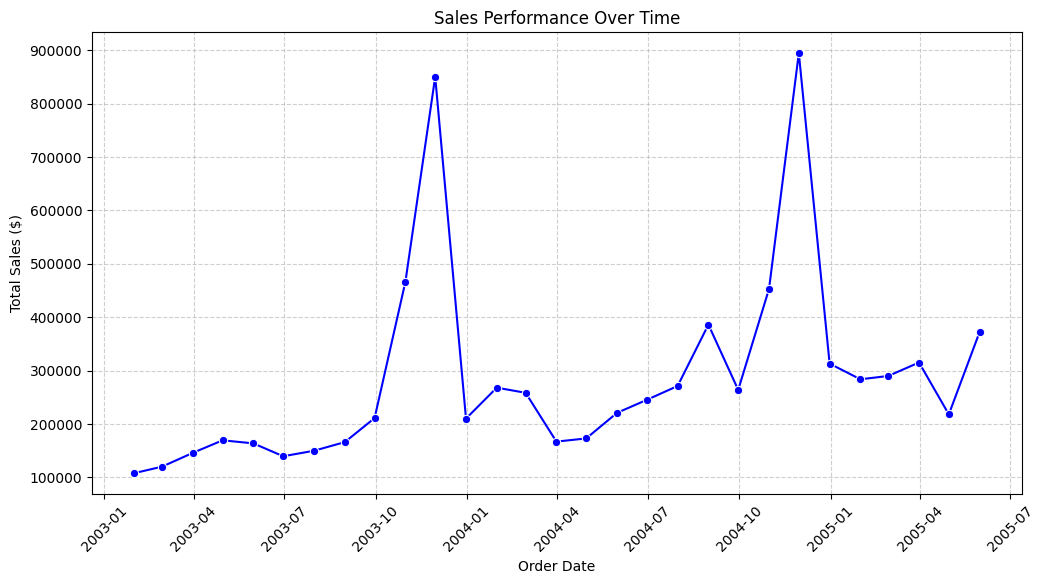

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "SalesData.xlsx"
df = pd.read_excel(file_path)

# Convert ORDERDATE to datetime format
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

# Calculate total sales per order
df["TOTALSALES"] = df["QUANTITYORDERED"] * df["PRICEEACH"]

# Aggregate sales by month
sales_over_time = df.resample('ME', on="ORDERDATE")["TOTALSALES"].sum().reset_index()

# Plot the sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x="ORDERDATE", y="TOTALSALES", data=sales_over_time, marker="o", color="blue")
plt.xlabel("Order Date")
plt.ylabel("Total Sales ($)")
plt.title("Sales Performance Over Time")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()


# How does deal size (small, medium, large) correlate with total sales?

Total Sales by Deal Size:
  DEALSIZE  TOTALSALES
0    Large   738757.91
1   Medium  4961736.68
2    Small  2592193.44


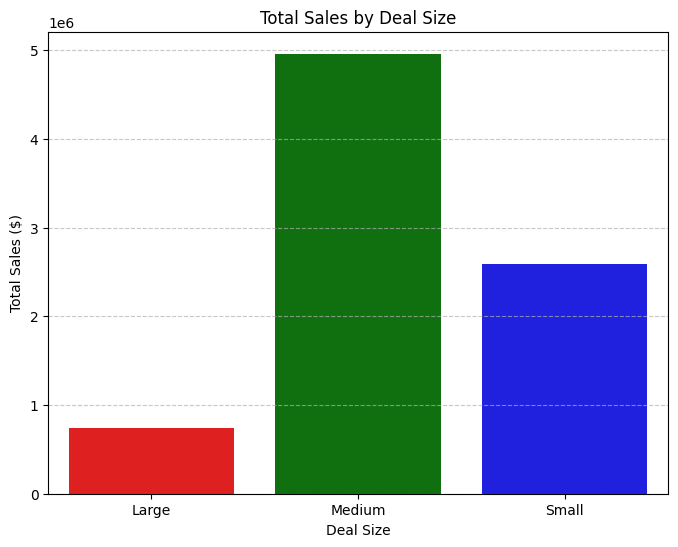

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "SalesData.xlsx"
df = pd.read_excel(file_path)

# Calculate total sales per order
df["TOTALSALES"] = df["QUANTITYORDERED"] * df["PRICEEACH"]

# Group by deal size and calculate total sales
sales_by_dealsize = df.groupby("DEALSIZE")["TOTALSALES"].sum().reset_index()

# Print the total sales per deal size
print("Total Sales by Deal Size:")
print(sales_by_dealsize)

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="DEALSIZE", y="TOTALSALES", hue="DEALSIZE", data=sales_by_dealsize, palette=["red", "green", "blue"], legend=False)
plt.xlabel("Deal Size")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by Deal Size")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# What is the percentage of contribution for each type of deal?

Percentage Contribution of Each Deal Size:
  DEALSIZE  PERCENTAGE
0    Large    8.908546
1   Medium   59.832670
2    Small   31.258784


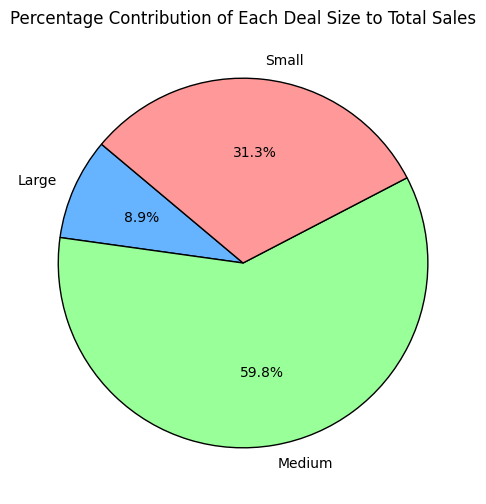

In [8]:
# Calculate percentage contribution of each deal size
sales_by_dealsize["PERCENTAGE"] = (sales_by_dealsize["TOTALSALES"] / sales_by_dealsize["TOTALSALES"].sum()) * 100

# Print the percentage contribution
print("Percentage Contribution of Each Deal Size:")
print(sales_by_dealsize[["DEALSIZE", "PERCENTAGE"]])

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    sales_by_dealsize["TOTALSALES"],
    labels=sales_by_dealsize["DEALSIZE"],
    autopct="%1.1f%%",
    colors=["#66b3ff", "#99ff99", "#ff9999"],
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Percentage Contribution of Each Deal Size to Total Sales")
plt.show()
